In [64]:
import torch
import torch.autograd as autograd         # computation graph
from torch import Tensor                  # tensor node in the computation graph
import torch.nn as nn                      # neural networks
import torch.optim as optim               # optimizers e.g. gradient descent, ADAM, etc.

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.ticker
from sklearn.model_selection import train_test_split

import numpy as np
import time
import scipy.io

#Set default dtype to double
torch.set_default_dtype(torch.double)

#PyTorch random number generator
torch.manual_seed(1234)      

# Random number generators in other libraries
np.random.seed(1234)

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

print(device)

if device == 'cuda': 
    print(torch.cuda.get_device_name()) 

cpu


In [65]:
#PyTorch random number generator
#torch.manual_seed(1234)

# Random number generators in other libraries
#np.random.seed(1234)

### pakage install and exact solution ready
import numpy as np
import math
import time
from numpy.linalg import solve
import matplotlib.pyplot as plt

# analytical solution parameters
left_boundary = 0
right_boundary = 1


# simple modes case sin(m\pi x)
def u(x):
    return   torch.sin(2*np.pi*x) #exact solution

def f_real(x):
    return  torch.sin(2*np.pi*x)




In [66]:
# 网络结构
import torch
import torch.nn as nn
import numpy as np

class Two_NN(nn.Module):
    def __init__(self,width):
        super().__init__()
        self.width = width
        self.fc1 = nn.Linear(1,width)
        self.fc2 = nn.Linear(width,1,bias=False)
        self.act1 = nn.ReLU()
        self.act2 = nn.Tanh()
    
    def forward(self,x):
        y = self.fc1(x)
        y = self.act1(y)
        y = self.fc2(y)

        return y

In [67]:
# get the analytical solution over the full domain
total_points=500
min= 0
max= 1

x = torch.linspace(min,max,total_points).view(-1,1) #prepare to NN
y = f_real(x)
#y = y.to(device)
print(x.shape, y.shape)

torch.Size([500, 1]) torch.Size([500, 1])


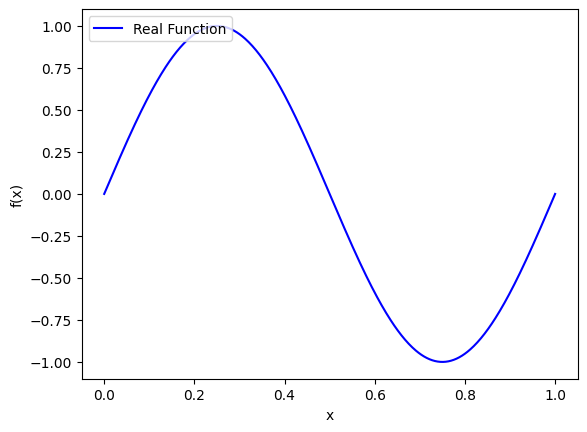

In [68]:
# plot the solutions
fig, ax1 = plt.subplots()
ax1.plot(x.detach().numpy(),y.detach().numpy(),color='blue',label='Real Function')
#ax1.plot(x_train.detach().numpy(),yh.detach().numpy(),color='red',label='Pred_Train')
ax1.set_xlabel('x',color='black')
ax1.set_ylabel('f(x)',color='black')
ax1.tick_params(axis='y', color='black')
ax1.legend(loc = 'upper left')

In [69]:
# 样本点的个数
Nf=500
x_PDE = torch.linspace(min,max,Nf).reshape(-1,1)

In [70]:
# Hyperparameters setting
#R_m_w = 3
#R_m_b = 3

X_min = 0
X_max = 1


#Store tensors to GPU
from torch.optim import lr_scheduler
#torch.manual_seed(123)
x_PDE=x_PDE.double().to(device)
y = y.to(device)


#参数： width*3
width = 60   #神经网路的参数



RFM_model = Two_NN(width=width)
RFM_model = RFM_model.to(device)

In [71]:
# Intialization setting
lr = 8e-2   #学习率
#optimizer1 = torch.optim.Adam(RFM_model.parameters(),lr=lr)


optimizer1 = torch.optim.Adam(RFM_model.parameters(),lr=lr)
loss = nn.MSELoss(reduction='mean')
NUM_EPOCHS = 30000
for epoch in range(NUM_EPOCHS):
    yh = RFM_model(x_PDE)
    #print('the shape of yh',yh.shape)
    #print('the shape of y',y.shape)
    loss_out = loss(yh,y)
    optimizer1.zero_grad()
    loss_out.backward()
    optimizer1.step()

    if  epoch % (1000)==0:
        print('-----------------')
        print(f'Epoch [{epoch}/{NUM_EPOCHS}], Loss: {loss_out.item():.8f}')

-----------------
Epoch [0/30000], Loss: 0.56063723
-----------------
Epoch [1000/30000], Loss: 0.00061778
-----------------
Epoch [2000/30000], Loss: 0.00047058
-----------------
Epoch [3000/30000], Loss: 0.00038708
-----------------
Epoch [4000/30000], Loss: 0.00015706
-----------------
Epoch [5000/30000], Loss: 0.01025795
-----------------
Epoch [6000/30000], Loss: 0.00026977
-----------------
Epoch [7000/30000], Loss: 0.00010835
-----------------
Epoch [8000/30000], Loss: 0.00154093
-----------------
Epoch [9000/30000], Loss: 0.00154534
-----------------
Epoch [10000/30000], Loss: 0.00012756
-----------------
Epoch [11000/30000], Loss: 0.00009663
-----------------
Epoch [12000/30000], Loss: 0.00010919
-----------------
Epoch [13000/30000], Loss: 0.00107197
-----------------
Epoch [14000/30000], Loss: 0.00012031
-----------------
Epoch [15000/30000], Loss: 0.00014135
-----------------
Epoch [16000/30000], Loss: 0.01526647
-----------------
Epoch [17000/30000], Loss: 0.00010424
-----

In [72]:
# Detach from GPU
x_plot = x_PDE.detach().cpu().numpy()
y_plot = y.detach().cpu().numpy()
yh_plot = yh.detach().cpu().numpy()

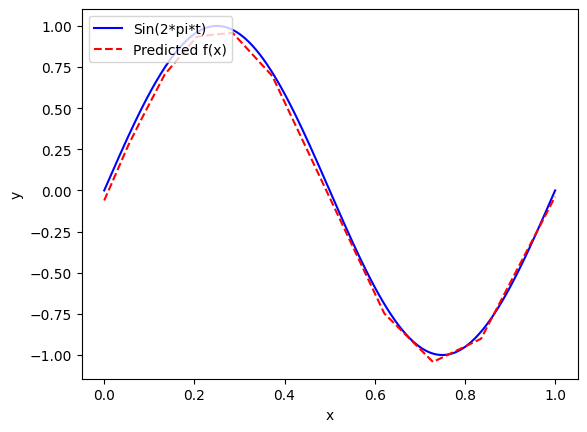

In [73]:
# Plot
fig, ax1 = plt.subplots()
ax1.plot(x,y_plot,color='blue',label='Sin(2*pi*t)')
ax1.plot(x,yh_plot,color='red',label='Predicted f(x)',linestyle = 'dashed')
#ax1.plot(x,f_x_plot,color='green',label='Computed u\'(x)')
ax1.set_xlabel('x',color='black')
ax1.set_ylabel('y',color='black')
ax1.tick_params(axis='y', color='black')
ax1.legend(loc = 'upper left')

In [74]:
FC1_Alpha1 = RFM_model.fc1.weight
FC1_Beta1 = RFM_model.fc1.bias
FC2_Weight = RFM_model.fc2.weight
print('the shape of FC1_Alpha1',FC1_Alpha1.shape)
print('the shape fo FC1_Beta1',FC1_Beta1.shape)
print('the shape of FC2_Weight',FC2_Weight.shape)
#print(torch.unsqueeze(FC1_Beta1, 1))
FC1_Alpha1_array = FC1_Alpha1.detach().numpy() 
FC1_Beta1_array = FC1_Beta1.detach().numpy() 
FC2_Weight_array = FC2_Weight.T.detach().numpy() 
# 保存为 txt 文件
result = "alpha_" + str(width)+".txt"
#print(result)
np.savetxt(result, FC1_Alpha1_array)
result = "beta_" + str(width)+".txt"
np.savetxt(result, FC1_Beta1_array)
result = "omega_" + str(width)+".txt"
np.savetxt(result, FC2_Weight_array)
#print(Theta_star)

the shape of FC1_Alpha1 torch.Size([60, 1])
the shape fo FC1_Beta1 torch.Size([60])
the shape of FC2_Weight torch.Size([1, 60])


In [75]:
g = x_PDE.clone()
g.requires_grad=True #Enable differentiation
out = RFM_model(g)


w1 = RFM_model.fc1.weight
bias1 = RFM_model.fc1.bias
w2 = RFM_model.fc2.weight



tempw1 = w1.clone()
tempbias1 = bias1.clone()
tempw2 = w2.clone()

temp_w1 = tempw1
temp_bias1 = torch.unsqueeze(tempbias1,1)
temp_w2 = tempw2.T

print (temp_w1.shape)
print (temp_bias1.shape)
print (temp_w2.shape)

J_W1 = torch.zeros(Nf,width).to(device)
J_Bias1 = torch.zeros(Nf,width).to(device)
J_W2 = torch.zeros(Nf,width).to(device)


for i in range(Nf):
    '''''
    J_weight1 = torch.autograd.grad(outputs=out[i,:], inputs=w1,grad_outputs=torch.ones_like(out[i,:]),create_graph = True, retain_graph = True)[0]
    J_bias1 = torch.autograd.grad(outputs=out[i,:], inputs=bias1,grad_outputs=torch.ones_like(out[i,:]),create_graph = True, retain_graph = True)[0]
    J_weight2 = torch.autograd.grad(outputs=out[i,:], inputs=w2,grad_outputs=torch.ones_like(out[i,:]),create_graph = True, retain_graph = True)[0]
 
    J_W1[i,:] = J_weight1.squeeze()
    J_Bias1[i,:] = J_bias1
    J_W2[i,:] = J_weight2
    '''''
    for j in range(width):
        if  temp_w1[j,0]*(i/(Nf-1))+temp_bias1[j,0] > 0:
            J_W1[i,j] = temp_w2[j,0]*(i/(Nf-1))
            J_Bias1[i,j] = temp_w2[j,0]
            J_W2[i,j] = temp_w1[j,0]*(i/(Nf-1))+temp_bias1[j,0]
       

torch.Size([60, 1])
torch.Size([60, 1])
torch.Size([60, 1])


In [76]:
# The shape of Jacobian operator 
print('the shape of J_weight1',J_W1.shape)
print('the shape of J_bias1',J_Bias1.shape)
print('the shape of J_W2',J_W2.shape)
#print(w1)
#print(J_W2)
#print(Theta_zero)
#print(bias1)

the shape of J_weight1 torch.Size([500, 60])
the shape of J_bias1 torch.Size([500, 60])
the shape of J_W2 torch.Size([500, 60])


In [77]:

S = torch.cat((J_W1,J_Bias1,J_W2), dim=1)
print('the shape of S',S.shape)
'''''
A1 = S[:,2*width:3*width]
zero_rows = torch.all(A1 == 0, dim=1)

# 打印结果
print("Zero rows mask:\n", zero_rows)

# 获取全零行的索引
zero_row_indices = torch.nonzero(zero_rows, as_tuple=True)
print("Indices of rows that are all zeros:", zero_row_indices)
'''''
DD = torch.zeros(1,3*width).to(device)
for i in range(3*width):
    si = S[:,i]
    if i == 0:
        AA = S[:,i+1:]
    elif i == 3*width-1:
        AA = S[:,:i]
    else:
        AA = torch.cat((S[:, :i], S[:, i+1:]), dim=1)
    AA_pinv = torch.linalg.pinv(AA)
    vv = torch.matmul(torch.eye(Nf)-(AA @ AA_pinv),si)
    DD[0,i] = torch.norm(vv,p=2)
print(torch.norm(AA,p=2))
print("\nIdentifiable Determination of parameter:\n",DD)
eps = 1e-4
count = torch.sum(DD>eps)
print("\nThe number of identiable parameter using Rau:\n",count.item())
TT1 = torch.zeros(width).to(device)
for j in range(width):
    if -temp_bias1[j,0]*temp_w1[j,0] > 0: 
        if -temp_bias1[j,0]*temp_w1[j,0] < temp_w1[j,0]**2:
            TT1[j] = 1
TT2 = torch.zeros(width).to(device)
for j in range(width):
    if temp_bias1[j,0] > 0: 
        if temp_bias1[j,0]+temp_w1[j,0] > 0:
            TT2[j] = 1

# 计算属于 (0, 1) 范围的元素个数
count = (TT1 > 0).sum()
print("\nThe number of threshold (-beta_j/alpha_j j=1,2,...,M) in (0,1) :\n",count.item())
count = ((TT2 > 0).sum() > 0).int()
print("\nExistence of line :\n",count.item())
# 定义矩阵 A
A = torch.matmul(S.T, S)
#A = S
# 进行奇异值分解
U, S11, Vh = torch.linalg.svd(A)  # Vh 是 V 的转置
eps = 1e-4
count = torch.sum(S11>eps)
print("\nThe number of identiable parameter using FIM :\n",count.item())
V2=Vh[count.item():,:]
#print(V2@V2.T)
#VVV2=V2@V2.T
#print(VVV2.shape)
# 打印分解结果
#print("U matrix:\n", U)
print("Singular values (S11):\n", S11)
#print("Vh matrix (V Transposed):\n", Vh)


#print(torch.diag(Vh@U))
# 获取 A 的维度
rows, cols = A.shape

# 构造 Sigma 为形状 (rows, cols) 的矩阵1
Sigma = torch.zeros(rows, cols)

# 计算最小的维度长度
diag_length = torch.minimum(torch.tensor(rows), torch.tensor(cols)).item()

# 将奇异值填入 Sigma 中
Sigma[:diag_length, :diag_length] = torch.diag(S11)

# 重构矩阵 A (通过 U * Sigma * Vh)
A_reconstructed = U @ Sigma @ Vh
'''''
# 打印重构后的矩阵 A
print("\nReconstructed A matrix:\n", A_reconstructed)

# 验证是否与原始矩阵 A 相同
print("\nOriginal A matrix:\n", A)
print("\nDifference between original and reconstructed A:\n", torch.norm(A - A_reconstructed,p=2))
'''''

the shape of S torch.Size([500, 180])
tensor(90.6801, grad_fn=<LinalgVectorNormBackward0>)

Identifiable Determination of parameter:
 tensor([[0.0000e+00, 9.8646e-14, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 6.9854e-15, 0.0000e+00, 0.0000e+00, 2.0634e-16,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 1.3592e-14, 1.2009e-13, 0.0000e+00, 0.0000e+00,
         5.4015e-14, 2.5678e-14, 2.0957e-16, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 1.4463e-15, 0.0000e+00, 2.9080e-15, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.3401e-14, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 6.1882e-14, 0.0000e+00, 0.0000e+00,

'\'\'\n# 打印重构后的矩阵 A\nprint("\nReconstructed A matrix:\n", A_reconstructed)\n\n# 验证是否与原始矩阵 A 相同\nprint("\nOriginal A matrix:\n", A)\nprint("\nDifference between original and reconstructed A:\n", torch.norm(A - A_reconstructed,p=2))\n'

In [78]:



lambda_reg = 1e-2
'''''
Theta_zero = {
    'Alpha': torch.zeros_like(FC1_Alpha1),
    'Beta': torch.zeros_like(FC1_Beta1),
    'Omega': torch.zeros_like(FC2_Weight)
}
'''''
Theta_zero = {
    'Alpha': FC1_Alpha1,
    'Beta': FC1_Beta1,
    'Omega': FC2_Weight
}
Theta_star = Theta_zero
# 初始化正则化矩阵 U (与模型参数形状匹配)
U_alpha = V2[:,0:width]
U_beta = V2[:,width:2*width] 
U_omega = V2[:,2*width:3*width]

#Lambda*torch.norm(torch.matmul(V2,Theta-Theta_star),p=2)
# Intialization setting
lr = 5e-3   #学习率

optimizer1 = torch.optim.Adam(RFM_model.parameters(),lr=lr)
loss = nn.MSELoss(reduction='mean')
NUM_EPOCHS = 20000
for epoch in range(NUM_EPOCHS):
    yh = RFM_model(x_PDE)
    #print('the shape of yh',yh.shape)
    #print('the shape of y',y.shape)
    
    '''''
    i = 0
    for param in model.parameters():
        if i ==0 :
            VV1 = torch.mm(V2[:,0:width],(param-Theta_star[0:width,:]))
        if i == 1:
            VV2 = torch.mm(V2[:,width:2*width],torch.unsqueeze(param, 1)-Theta_star[width:2*width,:])
        if i== 2:
            VV3 = torch.mm(V2[:,2*width:3*width],torch.transpose(param,0,1)-Theta_star[2*width:3*width,:])
        i = i+1
    '''''
   
    w1 = RFM_model.fc1.weight
    bias1 = RFM_model.fc1.bias
    w2 = RFM_model.fc2.weight

    ww1  = w1.clone()
    bb1 = bias1.clone()
    ww2 = w2.clone()
    temp_w1 = ww1
    temp_bias1 = bb1
    temp_w2 = ww2
    '''''
    VV1 = torch.mm(V2[:,0:width].detach(),temp_w1-Theta_star[0:width,:].detach())
    VV2 = torch.mm(V2[:,width:2*width].detach(),temp_bias1-Theta_star[width:2*width,:].detach())
    VV3 = torch.mm(V2[:,2*width:3*width].detach(),temp_w2 -Theta_star[2*width:3*width,:].detach())
    '''''
    l2_reg = torch.tensor(0.)  # 初始化 L2 正则化值
    
    # 只对第一层的权重进行 L2 正则化
    alpha_diff = w1 - Theta_star['Alpha']
    l2_reg += torch.norm(U_alpha.detach() @ alpha_diff, p=2) ** 2
    
    # 对第一层的偏置进行 L2 正则化
    beta_diff = torch.unsqueeze(bias1 - Theta_star['Beta'],1)
    l2_reg += torch.norm(U_beta.detach() @ beta_diff, p=2) ** 2 
    
    # 对第二层的权重进行 L2 正则化
    omega_diff = (w2 - Theta_star['Omega']).T
    l2_reg += torch.norm(U_omega.detach() @ omega_diff, p=2) ** 2
    
    #VV1 = ww1
    #VV2 = bb1
    #VV3 = ww2
    #print(Theta_star[0:width,:].shape)
    #print(Theta_star[width:2*width,:].shape)
    #print(Theta_star[2*width:3*width,:].shape)
   ##reg_term = lambda_reg*(torch.norm(VV1+VV2+VV3,p=2)*torch.norm(VV1+VV2+VV3,p=2))
    loss1 = loss(yh,y)
     # 将正则化项加入到损失函数中
    loss_out = loss1 + lambda_reg * l2_reg

    
    optimizer1.zero_grad()
    loss_out.backward()
    #torch.nn.utils.clip_grad_norm_(RFM_model.parameters(), max_norm=1.0)

    optimizer1.step()

    if epoch % 1000 == 0:
        print('-----------------')
        print(f'Epoch [{epoch}/{NUM_EPOCHS}], Loss: {loss_out.item():.8f}, L2 Reg: {lambda_reg *l2_reg.item():.32f}')

-----------------
Epoch [0/20000], Loss: 0.00923816, L2 Reg: 0.00000000000000000000000000000000
-----------------
Epoch [1000/20000], Loss: 0.00015348, L2 Reg: 0.00000000000000000000000000000000
-----------------
Epoch [2000/20000], Loss: 0.00014060, L2 Reg: 0.00000000000000000000000000000000
-----------------
Epoch [3000/20000], Loss: 0.00013606, L2 Reg: 0.00000000000000000000000000000000
-----------------
Epoch [4000/20000], Loss: 0.00013402, L2 Reg: 0.00000000000000000000000000000000
-----------------
Epoch [5000/20000], Loss: 0.00013308, L2 Reg: 0.00000000000000000000000000000000
-----------------
Epoch [6000/20000], Loss: 0.00013257, L2 Reg: 0.00000000000000000000000000000000
-----------------
Epoch [7000/20000], Loss: 0.00013363, L2 Reg: 0.00000000000000000000000000000000
-----------------
Epoch [8000/20000], Loss: 0.00013143, L2 Reg: 0.00000000000000000000000000000000
-----------------
Epoch [9000/20000], Loss: 0.00013097, L2 Reg: 0.00000000000000000000000000000000
-------------

In [79]:
# Detach from GPU
x_plot = x_PDE.detach().cpu().numpy()
y_plot = y.detach().cpu().numpy()
yh_plot = yh.detach().cpu().numpy()

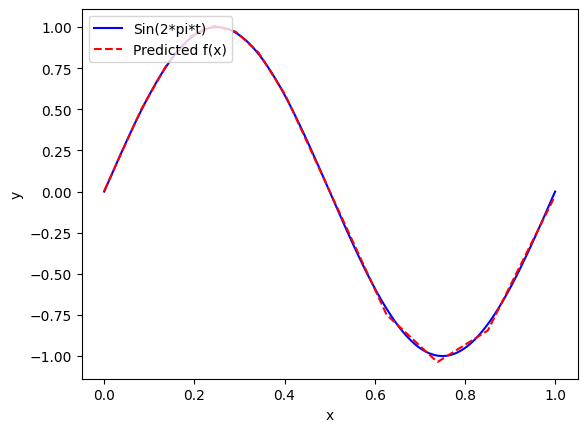

In [80]:
# Plot
fig, ax1 = plt.subplots()
ax1.plot(x,y_plot,color='blue',label='Sin(2*pi*t)')
ax1.plot(x,yh_plot,color='red',label='Predicted f(x)',linestyle = 'dashed')
#ax1.plot(x,f_x_plot,color='green',label='Computed u\'(x)')
ax1.set_xlabel('x',color='black')
ax1.set_ylabel('y',color='black')
ax1.tick_params(axis='y', color='black')
ax1.legend(loc = 'upper left')

In [81]:
FC1_Alpha1 = RFM_model.fc1.weight
FC1_Beta1 = RFM_model.fc1.bias
FC2_Weight = RFM_model.fc2.weight
print('the shape of FC1_Alpha1',FC1_Alpha1.shape)
print('the shape fo FC1_Beta1',FC1_Beta1.shape)
print('the shape of FC2_Weight',FC2_Weight.shape)

FC1_Alpha1_array = FC1_Alpha1.detach().numpy() 
FC1_Beta1_array = FC1_Beta1.detach().numpy() 
FC2_Weight_array = FC2_Weight.T.detach().numpy() 
# 保存为 txt 文件
result = "Nalpha_" + str(width)+".txt"
#print(result)
np.savetxt(result, FC1_Alpha1_array)
result = "Nbeta_" + str(width)+".txt"
np.savetxt(result, FC1_Beta1_array)
result = "Nomega_" + str(width)+".txt"
np.savetxt(result, FC2_Weight_array)


the shape of FC1_Alpha1 torch.Size([60, 1])
the shape fo FC1_Beta1 torch.Size([60])
the shape of FC2_Weight torch.Size([1, 60])


In [82]:
g = x_PDE.clone()
g.requires_grad=True #Enable differentiation
out = RFM_model(g)


w1 = RFM_model.fc1.weight
bias1 = RFM_model.fc1.bias
w2 = RFM_model.fc2.weight


tempw1 = w1.clone()
tempbias1 = bias1.clone()
tempw2 = w2.clone()

temp_w1 = tempw1
temp_bias1 = torch.unsqueeze(tempbias1,1)
temp_w2 = tempw2.T

print (temp_w1.shape)
print (temp_bias1.shape)
print (temp_w2.shape)

J_W1 = torch.zeros(Nf,width).to(device)
J_Bias1 = torch.zeros(Nf,width).to(device)
J_W2 = torch.zeros(Nf,width).to(device)


for i in range(Nf):
    '''''
    J_weight1 = torch.autograd.grad(outputs=out[i,:], inputs=w1,grad_outputs=torch.ones_like(out[i,:]),create_graph = True, retain_graph = True)[0]
    J_bias1 = torch.autograd.grad(outputs=out[i,:], inputs=bias1,grad_outputs=torch.ones_like(out[i,:]),create_graph = True, retain_graph = True)[0]
    J_weight2 = torch.autograd.grad(outputs=out[i,:], inputs=w2,grad_outputs=torch.ones_like(out[i,:]),create_graph = True, retain_graph = True)[0]
 
    J_W1[i,:] = J_weight1.squeeze()
    J_Bias1[i,:] = J_bias1
    J_W2[i,:] = J_weight2
    '''''
    for j in range(width):
        if  temp_w1[j,0]*(i/(Nf-1))+temp_bias1[j,0] > 0:
            J_W1[i,j] = temp_w2[j,0]*(i/(Nf-1))
            J_Bias1[i,j] = temp_w2[j,0]
            J_W2[i,j] = temp_w1[j,0]*(i/(Nf-1))+temp_bias1[j,0]
       

torch.Size([60, 1])
torch.Size([60, 1])
torch.Size([60, 1])


In [83]:
# The shape of Jacobian operator 
print('the shape of J_weight1',J_W1.shape)
print('the shape of J_bias1',J_Bias1.shape)
print('the shape of J_W2',J_W2.shape)
#print(w1)
#print(J_W2)
#print(bias1)

the shape of J_weight1 torch.Size([500, 60])
the shape of J_bias1 torch.Size([500, 60])
the shape of J_W2 torch.Size([500, 60])


In [84]:
S = torch.cat((J_W1,J_Bias1,J_W2), dim=1)
lambda_reg_tensor = torch.tensor(lambda_reg)
S = torch.cat((S,torch.sqrt(lambda_reg_tensor)*V2),dim=0)
print('the shape of S',S.shape)
F = torch.matmul(S.T, S)
print(F.shape)
import torch

# 定义矩阵 A
A = torch.matmul(S.T, S)
#A = S
# 进行奇异值分解
U, Sigma, Vh = torch.linalg.svd(A)  # Vh 是 V 的转置

# 打印分解结果
#print("U matrix:\n", U)
print("Singular values (Sigma):\n", Sigma)
#print("Vh matrix (V Transposed):\n", Vh)
eps = 1e-6
count = torch.sum(Sigma>eps)
print(count.item())



the shape of S torch.Size([658, 180])
torch.Size([180, 180])
Singular values (Sigma):
 tensor([7.0641e+03, 1.1615e+03, 2.7766e+02, 9.6264e+01, 5.4233e+01, 3.5053e+01,
        1.5993e+01, 4.2271e+00, 3.6868e+00, 3.3534e+00, 2.2095e+00, 1.4307e+00,
        1.2334e+00, 3.8656e-01, 2.8476e-01, 2.2315e-01, 1.8450e-01, 1.3696e-01,
        6.4728e-02, 4.4675e-02, 2.2554e-02, 1.2790e-02, 1.0000e-02, 1.0000e-02,
        1.0000e-02, 1.0000e-02, 1.0000e-02, 1.0000e-02, 1.0000e-02, 1.0000e-02,
        1.0000e-02, 1.0000e-02, 1.0000e-02, 1.0000e-02, 1.0000e-02, 1.0000e-02,
        1.0000e-02, 1.0000e-02, 1.0000e-02, 1.0000e-02, 1.0000e-02, 1.0000e-02,
        1.0000e-02, 1.0000e-02, 1.0000e-02, 1.0000e-02, 1.0000e-02, 1.0000e-02,
        1.0000e-02, 1.0000e-02, 1.0000e-02, 1.0000e-02, 1.0000e-02, 1.0000e-02,
        1.0000e-02, 1.0000e-02, 1.0000e-02, 1.0000e-02, 1.0000e-02, 1.0000e-02,
        1.0000e-02, 1.0000e-02, 1.0000e-02, 1.0000e-02, 1.0000e-02, 1.0000e-02,
        1.0000e-02, 1.0000e-02, 1